<a href="https://colab.research.google.com/github/yilin10/MusicalGenreClassification/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Music Languages and System - Assignment 1

## Imports

Import of **Libraries**

In [0]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import sklearn.svm
import IPython.display as ipd
import scipy as sp

Upload of your personal **Kaggle Api token** to enable download from Kaggle

In [0]:
from google.colab import files
files.upload() # Choose kaggle.json (your personal Kaggle API token)

! rm -r ~/.kaggle
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json # Change the permissions of the file.

Saving kaggle.json to kaggle.json


Download of the dataset from Kaggle

In [0]:
! pip install -q kaggle
! mkdir ~/dataset
! kaggle datasets download -d carlthome/gtzan-genre-collection
! unzip -q gtzan-genre-collection.zip -d ~/dataset

mkdir: cannot create directory ‘/root/dataset’: File exists
gtzan-genre-collection.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /root/dataset/genres/blues/blues.00000.au? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## Observing Data

We can get the dataset from kaggle, which includes 100 pieces of 30s audio from 10 different music genres provided by GTZAN. All the audio tracks are sampled at 22050 Hz Mono 16-bit audio files in .au format.

And in our task we need to classify Blues, Metal, Hip-Hop, Reggae.

**To be Finished Later**...


## Data Preprocessing

We should do some general analysis to show the statistical overview to understand the data we have.

**This part also can be done later.**


## Feature Extracting

In this part, we are goint to extract some feature using librosa library used for future steps, like training our model.

1. Feature Selecting
- mfcc: librosa.feature.mfcc
- melspectrogram: librosa.feature.melspectrogram
- tempogram: librosa.feature.tempogram


2. Feature extracting: **mfcc**

In [42]:
#we need to analysis Blues, Metal, Hip-Hop, Reggae
ana_class = ["blues","metal","hiphop","reggae"] 
dict_train_features_mfcc = {"blues": [], "metal": [], "hiphop": [], "reggae": []}

n_mfcc = 13 # try: change back to 13
train_path = "../root/dataset/genres/"

for each in ana_class:
    train_test_folder = train_path + format(each)
    #the current folder/categories
    print("Current train_test_folder is: " + train_test_folder)

    train_catg_files = [f for f in os.listdir(train_test_folder) if f.endswith('.au')]
    #print(train_catg_files)
    n_train_samples = len(train_catg_files) 
    #how much files in each category
    print("Number of training samples in this category: ", n_train_samples)
    
    #store feature result
    train_features = np.zeros((n_train_samples, n_mfcc))
    
    #print(train_features)
    for index, each_file in enumerate(train_catg_files):
        each_file_path = os.path.join(train_test_folder, each_file)
        y, sr = librosa.load(each_file_path)
        #n_mfcc=20
        feature_mfcc = librosa.feature.mfcc(y, sr, n_mfcc=13) 
        train_features[index, :] = np.mean(feature_mfcc, axis=1)
        #print("train_features", train_features)
        #dont need tempo in this way, for now...
        #tempo, beat_frames = librosa.beat.beat_track(y, sr)
        #print("Estimated tempo: ", tempo)

    dict_train_features_mfcc[each] = train_features


Current train_test_folder is: ../root/dataset/genres/blues
Number of training samples in this category:  100
Current train_test_folder is: ../root/dataset/genres/metal
Number of training samples in this category:  100
Current train_test_folder is: ../root/dataset/genres/hiphop
Number of training samples in this category:  100
Current train_test_folder is: ../root/dataset/genres/reggae
Number of training samples in this category:  100


3. Feature extracting: **tempogram** 

    [---not using right now---]

    There might be some problems with the window length need to be fixed.



In [0]:
dict_train_features_tempo = {"blues": [], "metal": [], "hiphop": [], "reggae": []}
for each in ana_class:
    train_test_folder = train_path + format(each)
    print("Current train_test_folder is: " + train_test_folder) #current folder
    train_catg_files = [f for f in os.listdir(train_test_folder) if f.endswith('.au')]
    n_train_samples = len(train_catg_files)
    train_features = np.zeros((n_train_samples,#???)) # win_length=384 too long

    for index, each_file in enumerate(train_catg_files):
        each_file_path = os.path.join(train_test_folder, each_file)
        y, sr = librosa.load(each_file_path)
        #New feature: tempogram
        feature_tempogram = librosa.feature.tempogram(y, sr)
        train_features[index, :] = np.mean(feature_tempogram, axis=1)
        

    dict_train_features_tempo[each] = train_features
#Test
print("---\n Testing...")
print(dict_train_features_tempo["blues"])

In [0]:
print(dict_train_features["blues"])
print(dict_train_features_tempo["blues"])

[[-1.21448978e+02  9.60805375e+01 -1.95898421e+01 ... -2.04378116e+00
  -1.76269026e+00 -3.96245312e+00]
 [-1.21363940e+02  1.22506683e+02 -1.47381965e+01 ...  2.69524786e+00
   3.41230547e+00 -2.71569238e+00]
 [-3.00981873e+01  1.03732518e+02 -1.97379711e+01 ...  4.72184211e+00
   4.90646799e-01  1.47166699e+00]
 ...
 [-1.55558833e+02  1.25645326e+02  1.60112256e+00 ...  9.69413886e-01
   2.02691569e+00 -5.73704447e+00]
 [-1.45280972e+02  1.02806649e+02 -1.25294329e+01 ... -9.52051838e-01
   2.25845906e-02 -2.00456166e+00]
 [-5.26972475e+01  7.44333591e+01 -1.86967667e+01 ...  3.68983828e+00
  -4.93847515e+00  4.42173063e+00]]


4. Feature extracting: **chroma**

In [41]:
dict_train_features_chroma = {"blues": [], "metal": [], "hiphop": [], "reggae": []}
for each in ana_class:
    train_test_folder = train_path + format(each)
    print("Current train_test_folder is: " + train_test_folder) #current folder
    train_catg_files = [f for f in os.listdir(train_test_folder) if f.endswith('.au')]
    n_train_samples = len(train_catg_files)
    n_size = 12
    train_features = np.zeros((n_train_samples,n_size)) # 12

    for index, each_file in enumerate(train_catg_files):
        each_file_path = os.path.join(train_test_folder, each_file)
        y, sr = librosa.load(each_file_path)
        #new feature
        feature_chroma = librosa.feature.chroma_stft(y,sr)
        train_features[index, :] = np.mean(feature_chroma, axis=1)

    dict_train_features_chroma[each] = train_features
#Test
print("---\n Testing...")
print(dict_train_features_chroma["blues"])

Current train_test_folder is: ../root/dataset/genres/blues
Current train_test_folder is: ../root/dataset/genres/metal
Current train_test_folder is: ../root/dataset/genres/hiphop
Current train_test_folder is: ../root/dataset/genres/reggae
testing...
[[0.29225903 0.19055726 0.34224745 ... 0.21464935 0.25209257 0.2602833 ]
 [0.31958133 0.30447576 0.36660105 ... 0.46159659 0.36630426 0.46472693]
 [0.34952515 0.33075454 0.29117243 ... 0.28203965 0.4997438  0.28577929]
 ...
 [0.30524382 0.41201784 0.30276149 ... 0.39435799 0.3372278  0.25945018]
 [0.29422466 0.2721143  0.40149029 ... 0.39088748 0.34161092 0.41863239]
 [0.32583133 0.26381195 0.3801748  ... 0.42798993 0.4770285  0.34903449]]




**Function calculate_features**

Define a function calculate any feature we want by walking through the file of specific genres.

In [0]:
def calculate_feature(categories = ["blues","metal","hiphop","reggae"] ,something):
    """

    """
    

    return dict_feature



## Data Spliting(???)

To avoid the influence from the order of the audio pice included in the dataset provided by Gtzan, as welss as enhancing the accuracy for future training and testing our model, we need to split the dataset into two parts, and change the order of it.

1. By dividing the data set according to a certain ratio, we can reasonably evaluate the performance of the learning algorithm in the face of unknown data.

2. If the data used to evaluate the model is not independent of the sample, the evaluation result may be inaccurate. We also can't figure out whether this algorithm can be applied in a wider range of situations or not.



Thus, we can try to split the data into two part( 80% : 20%) in order to have totally different data with labels for training and testing individually.

In [0]:
# sklearn provides the function to split data
from sklearn.model_selection import train_test_split
# feature: 1. mfcc
# split 80% for training and 20% for testing
# the random seed is set to 22 here in order to see a fixed output based on this.



y_train_all= np.zeros((80, 4))

y_test_all= np.zeros((20, 4))

In [61]:
for index in dict_train_features:
    i = 0
    y_train, y_test,x_train,x_test = train_test_split(
        dict_train_features_mfcc[index], dict_train_features_chroma[index],
        test_size = 0.2,
        random_state = 22)
    print("Index:",index)
    #print(dict_train_features_mfcc[index])
    #need to be finished
    



Index: blues
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


ValueError: ignored

## Playground 1(Test 0410 )

This part is not useful, just try to play with the dataset we have in order to get familiar with how to extract the needed features.

First, I am trying to play with Library librosa with a simple audio file.


In [37]:
path = "../root/dataset/genres/blues/blues.00000.au"
y, sr = librosa.load(path) # samplerate
#c_path = librosa.util.example_audio_file()
#sample_rate = librosa.get_samplerate(c_path)

tempo, beat_frames = librosa.beat.beat_track(y, sr)

f_mfcc = librosa.feature.mfcc(y, sr)
duration = librosa.get_duration(y, sr)
rms = librosa.feature.rms(y)
mels = librosa.feature.melspectrogram(y,sr) #calculate the melspectrogram
spt_flat = librosa.feature.spectral_flatness(y)
feature_tempogram = librosa.feature.tempogram(y, sr,10)
feature_chroma = librosa.feature.chroma_stft(y,sr)

print("current file: ", path, "with sample rate: ", sr) # 
#print("y = ", y)
print('The Estimated tempo is : {:.2f} beats per minute'.format(tempo))
print("mfcc = ", f_mfcc)
print("The duration of the file is: ", duration, "in seconds")
print("RMS: ", rms)
print("MELS: ", mels)
print("Spectral Flatness:", spt_flat)
print("len of Spectral Flatness:", len(spt_flat))
print("feature_tempogram:",feature_tempogram)
print("len of feature_tempogram:", len(feature_tempogram))

print("feature_chroma:",feature_chroma)
print("len of feature_chroma:", len(feature_chroma))



/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


current file:  ../root/dataset/genres/blues/blues.00000.au with sample rate:  22050
The Estimated tempo is : 123.05 beats per minute
mfcc =  [[-211.48465086 -208.94482648 -193.90886432 ... -109.99914277
   -86.84641504  -79.03764389]
 [  99.02296527  101.24677684  102.2439539  ...  150.07934372
   138.89685143  140.24707739]
 [ -10.63469419   -9.34669827    1.91543412 ...  -50.79513665
   -36.61398204  -31.44394114]
 ...
 [   8.94441077    6.88274853    3.65002299 ...   -2.85715698
    -6.25478926   -0.48850937]
 [   3.07485139    4.56672571    4.78899975 ...   -7.57468805
    -8.44005951   -7.88065949]
 [   5.04152675    2.8966338     0.94024655 ...   -7.55533868
     0.29069301    2.65881555]]
The duration of the file is:  30.013333333333332 in seconds
RMS:  [[0.02698701 0.03934191 0.0497628  ... 0.1405525  0.13533325 0.14893965]]
MELS:  [[3.52039269e+00 1.84593385e+00 7.44535793e-01 ... 2.23298189e+00
  2.25105209e+00 1.91527191e+01]
 [2.63766960e+00 3.33343668e+00 5.02164405e+00 ..

What we can get from the sample audio file as **general information**,
1. basic info: sample rate, duration of the file, estimated tempo
2. low level feature info:
    - mfcc (recognition)
    - melspectrogram
    - spectral_flatness (tonal)
3. high level feature info


Using the four categories{Blues, Metal, Hip-hop, Reggae} as instructed.

In [62]:
#we need to analysis Blues, Metal, Hip-Hop, Reggae
ana_class = ["blues","metal","hiphop","reggae"] 
dict_train_features = {"blues": [], "metal": [], "hiphop": [], "Reggae": []}
n_mfcc = 20
# try: change back to 13
train_path = "../root/dataset/genres/"


for each in ana_class:
    train_test_folder = train_path + format(each)
    #the current folder/categories
    print("Current train_test_folder is: " + train_test_folder)

    train_catg_files = [f for f in os.listdir(train_test_folder) if f.endswith('.au')]
    #print(train_catg_files)
    n_train_samples = len(train_catg_files) 
    #how much files in each category
    print("Number of training samples in this category: ", n_train_samples)
    
    #store feature result
    train_features = np.zeros((n_train_samples, n_mfcc))
    
    #print(train_features)
    for index, each_file in enumerate(train_catg_files):
        each_file_path = os.path.join(train_test_folder, each_file)
        y, sr = librosa.load(each_file_path)
        feature_mfcc = librosa.feature.mfcc(y, sr)
        train_features[index, :] = np.mean(feature_mfcc, axis=1)
        #print("train_features", train_features)
        #dont need tempo in this way, for now...
        #tempo, beat_frames = librosa.beat.beat_track(y, sr)
        #print("Estimated tempo: ", tempo)

    dict_train_features[each] = train_features
    print(dict_train_features["blues"])

Current train_test_folder is: ../root/dataset/genres/blues
Number of training samples in this category:  100
[[-1.21448978e+02  9.60805375e+01 -1.95898421e+01 ... -2.04378116e+00
  -1.76269026e+00 -3.96245312e+00]
 [-1.21363940e+02  1.22506683e+02 -1.47381965e+01 ...  2.69524786e+00
   3.41230547e+00 -2.71569238e+00]
 [-3.00981873e+01  1.03732518e+02 -1.97379711e+01 ...  4.72184211e+00
   4.90646799e-01  1.47166699e+00]
 ...
 [-1.55558833e+02  1.25645326e+02  1.60112256e+00 ...  9.69413886e-01
   2.02691569e+00 -5.73704447e+00]
 [-1.45280972e+02  1.02806649e+02 -1.25294329e+01 ... -9.52051838e-01
   2.25845906e-02 -2.00456166e+00]
 [-5.26972475e+01  7.44333591e+01 -1.86967667e+01 ...  3.68983828e+00
  -4.93847515e+00  4.42173063e+00]]
Current train_test_folder is: ../root/dataset/genres/metal
Number of training samples in this category:  100
[[-1.21448978e+02  9.60805375e+01 -1.95898421e+01 ... -2.04378116e+00
  -1.76269026e+00 -3.96245312e+00]
 [-1.21363940e+02  1.22506683e+02 -1.4738

**Visulise the features of MFCC**


Something seems wrong...

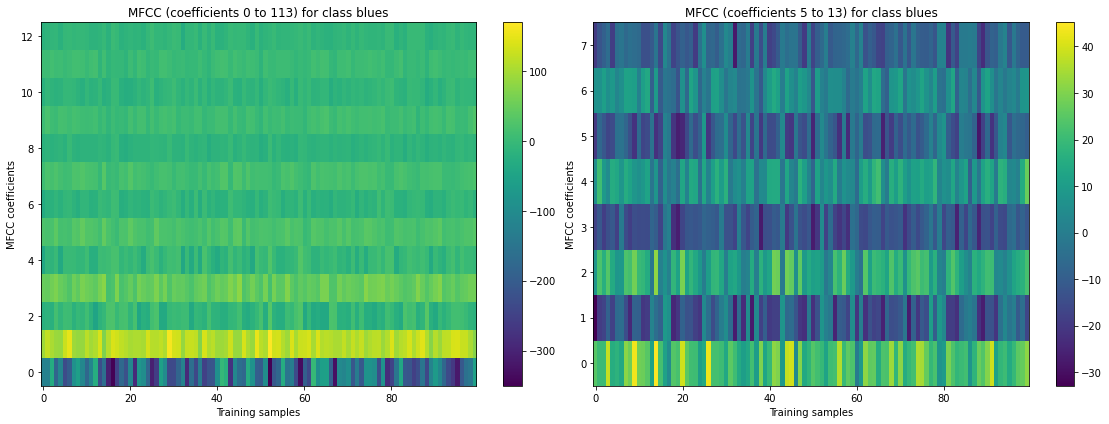

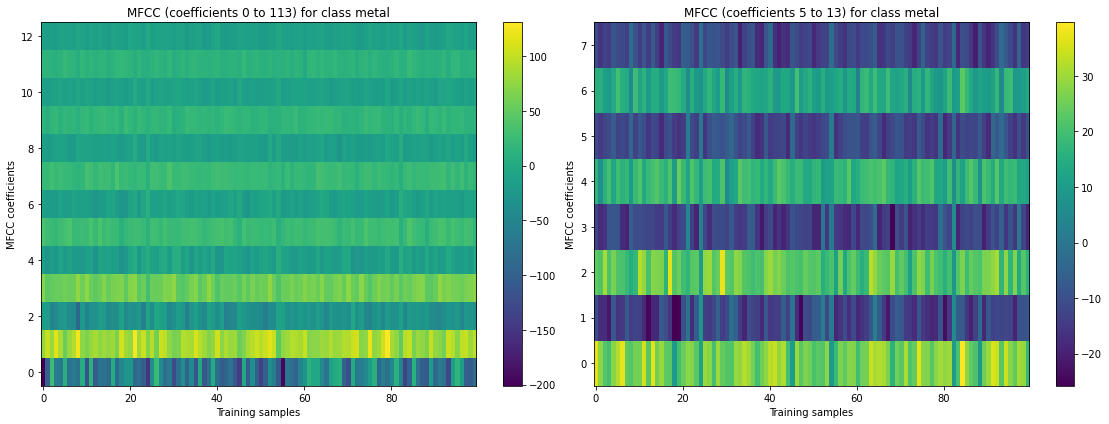

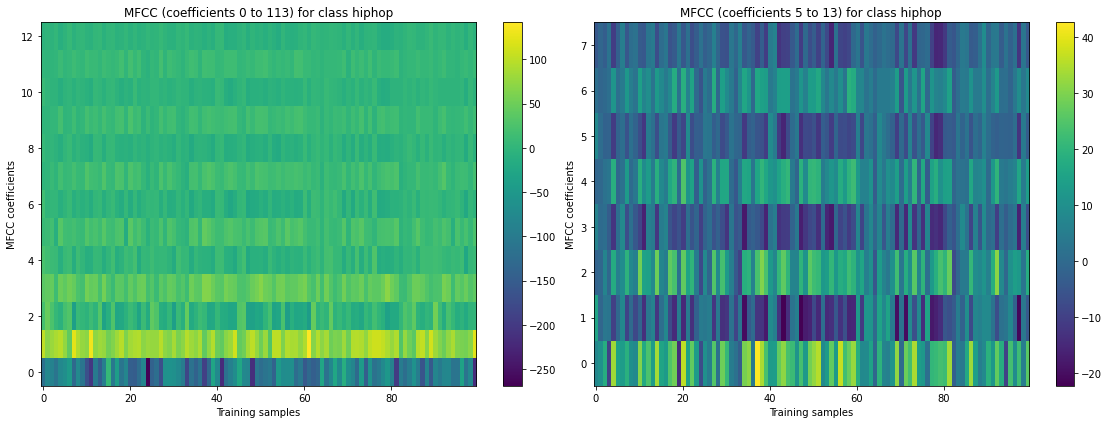

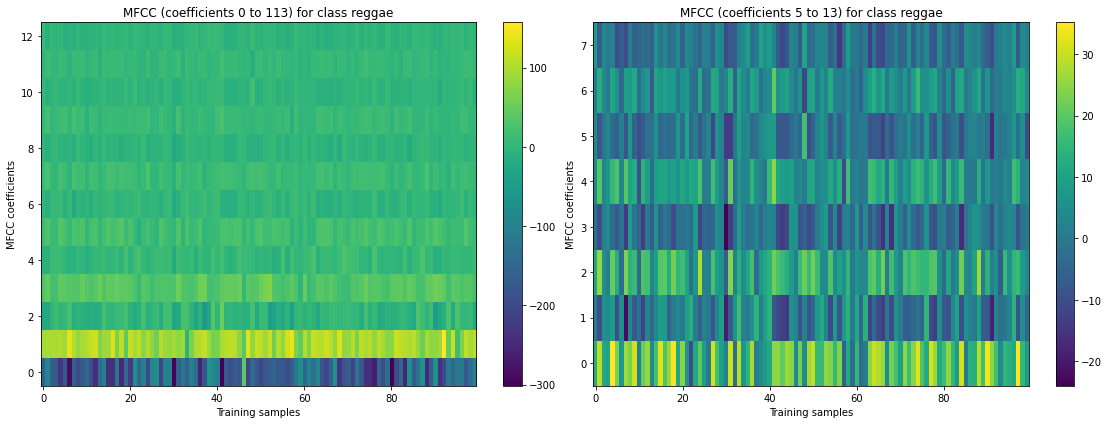

In [66]:
for each in ana_class:
    mfcc = dict_train_features_mfcc[each].transpose()
    
    # Visualization
    figure = plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.imshow(mfcc, origin='lower', aspect='auto')
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.title('MFCC (coefficients 0 to 113) for class {}'.format(each))
    plt.colorbar()
    plt.tight_layout()

    mfcc_upper = mfcc[5:]
    plt.subplot(1,2,2)
    plt.imshow(mfcc_upper, origin='lower', aspect='auto')
    plt.title('MFCC (coefficients 5 to 13) for class {}'.format(each))
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.tight_layout()

## Training

### 0. KNN

### 1. Support Vevtor Machine (SVM) 

using sklearn [SVM](https://scikit-learn.org/stable/modules/svm.html#classification)

In [69]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
print(clf.fit(X, y))



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


...

## Testing


## Cross Validating

In [0]:
print pd.DataFrame(grid.cv_results_)

We can use **k-fold cross-validation** to do the selecting for the best parameter for our model.

## Optimization

## Conclusion

## Team Work
**0410 Discussion**
1. apply preprocessing to audio files
2. how to split our dataset to {training, testing} to make sure the difference of the two groups
3. check if our dataset is balanced? Actually it is already balanced.
4. which set of features can to useful for our cases
5. apply feature selection?
6. choose which classification method?
7. try different parameter for the classfier
8. evaluate the model
9. display the result

## Reference Materials